## Advertising Sales Channel Prediction 

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [1]:
#import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.preprocessing import (StandardScaler,
                                  PolynomialFeatures)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#info about the data shape of data,type of individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


There are 5 columns and 200 rows with no null values. 2 types of datype can be seen int64 and float64 

In [4]:
# to check for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
# to check for duplicated values
df.duplicated().sum()

0

No duplicate values in the dataframe

In [6]:
# to drop 'Unnamed: 0' column as it is an index column.
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
#to get statistical summary of each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


<AxesSubplot:xlabel='TV', ylabel='sales'>

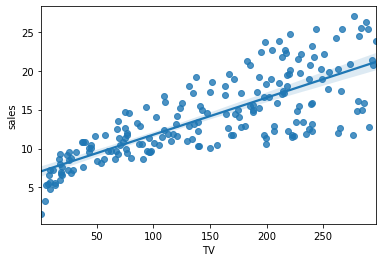

In [9]:
sns.regplot(x='TV',y='sales',data=df)

tv and sales have positive linear relationship,with 
increase in tv ads the sales are also going up.

<AxesSubplot:xlabel='radio', ylabel='sales'>

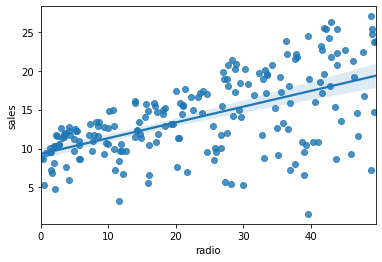

In [10]:
sns.regplot(x='radio',y='sales',data=df)

Radio and sale have linear relationship 

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

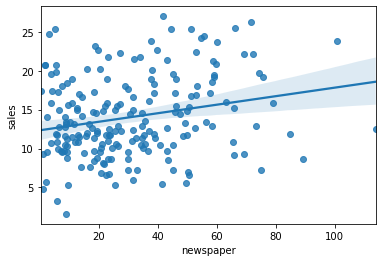

In [11]:
sns.regplot(x='newspaper',y='sales',data=df)

newspaper and sales have no relationship.

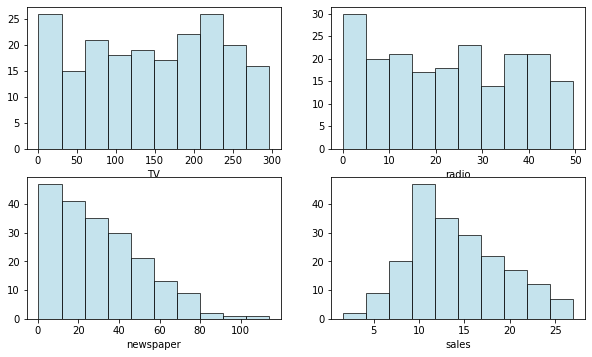

In [12]:
#plots to see the distribution of continuous features
plt.figure(figsize=(10,12))
plt.subplot(4,2,1)
plt.hist(df.TV, color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('TV')

plt.subplot(4,2,2)
plt.hist(df.radio, color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('radio')

plt.subplot(4,2,3)
plt.hist(df.newspaper, color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('newspaper')

plt.subplot(4,2,4)
plt.hist(df.sales, color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('sales')

plt.show()

TV and radio are normally distributed whereas newspaper
is right skewed and sales has left skewness.

<function matplotlib.pyplot.show(close=None, block=None)>

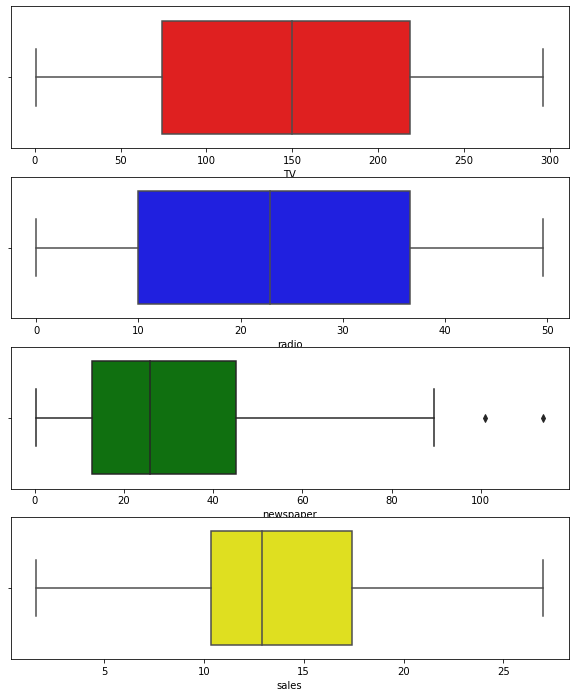

In [13]:
#checking for the outliers
plt.figure(figsize=(10,12))
plt.subplot(4,1,1)
sns.boxplot(x= df.TV,color='red')

plt.subplot(4,1,2)
sns.boxplot(x= df.radio,color='blue')

plt.subplot(4,1,3)
sns.boxplot(x= df.newspaper,color='green')

plt.subplot(4,1,4)
sns.boxplot(x= df.sales,color='yellow')

plt.show

no outliers are present although we can see two in newspaper 
but they can be ignored

<AxesSubplot:>

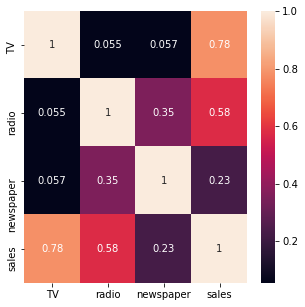

In [14]:
plt.figure(figsize =(5,5))
sns.heatmap(df.corr(),annot=True)

sales and newspaper shows no relation, where as TV has positive correlation with sales.

In [9]:
#to check correlation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


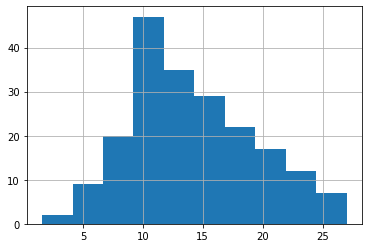

In [16]:
# check target column
df.sales.hist();

In [19]:
#to 
from scipy.stats import boxcox as bxcx

In [20]:
 #to remove the skewness by using boxcox
bc_result = bxcx(df.sales)
bxcx_sales = bc_result[0]
lam = bc_result[1]

In [21]:
lam

0.5778978780109713

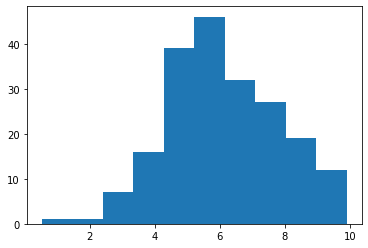

In [22]:
# to check after normalizing sales column
plt.hist(bxcx_sales);

In [23]:
#to find p value
normaltest(bxcx_sales)

NormaltestResult(statistic=0.24434700884489716, pvalue=0.8849948046685562)

### Testing Regression

LinearRegression()

In [24]:
lr = LinearRegression()

In [25]:
#spliting the data in to x and y
y_col = 'sales'

x = df.drop(y_col, axis=1)
y = df[y_col]

In [26]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [27]:
pf = PolynomialFeatures(degree=2, include_bias=False)
x_pf = pf.fit_transform(x)

In [28]:
x.shape

(200, 3)

In [29]:
x_pf.shape

(200, 9)

In [30]:
#spliting dataset into training(70%) and testing(30%)
x_train, x_test, y_train, y_test = train_test_split(x_pf, y, test_size=0.3, random_state=42)

In [31]:
x_train.shape

(140, 9)

In [32]:
#to apply standard scaler
s = StandardScaler()
x_train_s = s.fit_transform(x_train)

In [33]:
x_train_s.shape

(140, 9)

In [34]:
# using bocox for target variable
bc_result2 = bxcx(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [35]:
lam2

0.7727685463165073

In [36]:
y_train_bc.shape

(140,)

In [37]:
#building linear regression
lr.fit(x_train_s, y_train_bc)
x_test_s = s.transform(x_test)
y_pred_bc = lr.predict(x_test_s)

In [38]:
from scipy.special import inv_boxcox as ibxcx

In [39]:
#to revert boxcox
y_pred_tran = ibxcx(y_pred_bc, lam2)
r2_score(y_pred_tran, y_test)

0.9759198129120666

Ridge regression()

In [49]:
#buildling ridge regression
rr =  Ridge(alpha=0.001)
rr =rr.fit(x_train_s,y_train_bc)
x_test_s = s.transform(x_test)
y_pred_bc = rr.predict(x_test_s)

In [51]:
y_pred_tran = ibxcx(y_pred_bc, lam2)
r2_score(y_pred_tran, y_test)

0.9759262748690598

Lasso regression()

In [45]:
#building lasso regression 
lasso = Lasso(alpha=0.0001)
lasso =lasso.fit(x_train_s,y_train_bc)
x_test_s = s.transform(x_test)
y_pred_bc = lasso.predict(x_test_s)

In [46]:
y_pred_tran = ibxcx(y_pred_bc, lam2)
r2_score(y_pred_tran, y_test)

0.9759834796873248

Support vector regression()

In [53]:
#building ridge regression
svr = SVR(kernel = 'rbf')
svr=svr.fit(x_train_s,y_train_bc)
x_test_s = s.transform(x_test)
y_pred_bc = svr.predict(x_test_s)

In [54]:
y_pred_tran = ibxcx(y_pred_bc, lam2)
r2_score(y_pred_tran, y_test)

0.8826412299968754

In [82]:
parameter={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
           'fit_intercept' : [True,False],
           'normalize' : ['deprecated'], 
           'precompute' : [True,False],
           'copy_X' : [True,False],
           'max_iter' : [1000],
           'tol' : [0.0001], 
           'warm_start' : [True,False],
           'positive' : [True,False],
           'random_state' : [None],
           'selection' : ['cyclic', 'random']}

In [83]:
param_grid = parameter

In [84]:
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

In [85]:
grid_result = grid.fit(x_train_s, y_train_bc)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


In [91]:
#finding out which parameter is giving best accuracy
grid.best_params_

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': True,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': True}

In [88]:
type(grid)

sklearn.model_selection._search.GridSearchCV

In [98]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.9662543530473189


saving the model

In [99]:
model=Lasso(alpha=0.0001)
model.fit(x_train_s,y_train_bc)

Lasso(alpha=0.0001)

In [100]:
import joblib
joblib.dump(model,'Salesmodel.pkl')

['Salesmodel.pkl']